In [26]:
from itertools import combinations, chain
from matplotlib import pyplot as plt
import microhapdb
import networkx as nx

In [2]:
markers = microhapdb.Marker.objectify(microhapdb.markers)
markers = [m for m in markers if "LV" not in m.name]

In [3]:
short = [m for m in markers if len(m) < 100]
medium = [m for m in markers if 100 <= len(m) < 200]
long = [m for m in markers if 200 <= len(m) < 300]
print(f"short N={len(short)} maxAe={max([m.data.Ae for m in short])}")
print(f"medium N={len(medium)} maxAe={max([m.data.Ae for m in medium])}")
print(f"long N={len(long)} maxAe={max([m.data.Ae for m in long])}")

short N=675 maxAe=10.818
medium N=1139 maxAe=16.593
long N=768 maxAe=72.533


In [27]:
graph = nx.Graph()
cmarkers = [m for m in markers if m.chrom == "chr19"]
graph.add_nodes_from(cmarkers)
for mh1, mh2 in combinations(cmarkers, 2):
    if abs(mh1.start - mh2.start) >= 10e6:
        graph.add_edge(mh1, mh2)

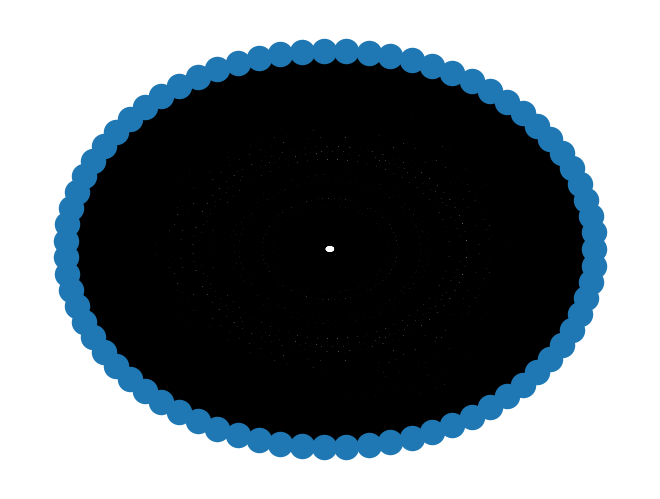

In [34]:
nx.draw_circular(graph)

In [29]:
gprime = max(nx.connected_components(graph), key=len)
print(len(graph), len(gprime))

75 75


In [31]:
cliques = list(nx.enumerate_all_cliques(graph))
len(cliques)

154508

In [79]:
max([len(c) for c in cliques])

6

In [80]:
max_cliques = [c for c in cliques if len(c) >= 5]
len(max_cliques)

48145

In [81]:
def has_short_medium_long(clique):
    has_short, has_medium, has_long = False, False, False
    for marker in clique:
        mlen = len(marker)
        if mlen < 100:
            has_short = True
        elif 100 <= mlen < 200:
            has_medium = True
        elif 200 <= mlen < 300:
            has_long = True
        if has_short and has_medium and has_long:
            return True
    return False

In [82]:
max_cliques_all_lengths = [c for c in max_cliques if has_short_medium_long(c)]
len(max_cliques_all_lengths)

25415

In [83]:
def clique_avg_ae(clique):
    return sum(marker.data.Ae for marker in clique) / len(clique)

In [84]:
max_cliques_all_lengths_sorted = sorted(max_cliques_all_lengths, key=lambda c: clique_avg_ae(c), reverse=True)

In [85]:
[m.name for m in max_cliques_all_lengths_sorted[0]], clique_avg_ae(max_cliques_all_lengths_sorted[0])

(['mh19SCUZJ-0028962',
  'mh19SCUZJ-0091391',
  'mh19USC-19qA.v2',
  'mh19WL-018',
  'mh19SCUZJ-0249059.v1'],
 9.2618)

In [86]:
[m.name for m in max_cliques_all_lengths_sorted[1]], clique_avg_ae(max_cliques_all_lengths_sorted[1])

(['mh19SCUZJ-0028962',
  'mh19USC-19pB',
  'mh19SCUZJ-0121709',
  'mh19SCUZJ-0164190',
  'mh19SCUZJ-0249059.v1'],
 9.099599999999999)

In [87]:
[m.name for m in max_cliques_all_lengths_sorted[2]], clique_avg_ae(max_cliques_all_lengths_sorted[2])

(['mh19SCUZJ-0028962',
  'mh19USC-19pB',
  'mh19ZHA-007',
  'mh19SCUZJ-0164190',
  'mh19SCUZJ-0249059.v1'],
 9.0414)

In [ ]:
# generate cliques of different lengths for each chromosome; combine, rank, filter, and see which panel of 120 has the best avg Ae